# Advances in Datamining.

# Assignment 0 - Experiments with random integers.

Auke Bruinsma, s1594443

**Theory**: Suppose you generate *n* random integers between *0* and *N*; How many *unique* values do you expect? 10.000? Less!!! (Your random numbers might repeat!) Find a formula that expresses this number: unique_values(n,N) = ???

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

### 1: A random sample

In [2]:
r = np.random.randint(0,high=1000,size=1000)
unique_arr = np.unique(r)
print('Random samples: {0}'.format(len(r)))
print('Unique values:  {0}'.format(len(unique_arr)))

Random samples: 1000
Unique values:  635


### 2: Iterating over $(n,N)$

In [3]:
def sampler(n,N,it):
    print('Range:                 {0}'.format(N))
    print('Samples:               {0}'.format(n))    
    print('Iterations:            {0}'.format(it))
    
    it_arr = []
    
    for i in range(it):
        arr = np.random.randint(0,high=N,size=n) # Sampling
        unique_arr = np.unique(arr) # Array with unique values.
        it_arr.append(len(unique_arr))
    
    print('Average unique values: {0}'.format(np.average(it_arr)))
    print('Standard deviation:    {0}'.format(np.std(it_arr)))
    
    plt.figure(figsize=(12,5))
    plt.bar(np.arange(len(it_arr)),it_arr)
    plt.ylim(0,n)
    plt.show()

Range:                 1000
Samples:               1000
Iterations:            50
Average unique values: 633.64
Standard deviation:    8.286760525078542


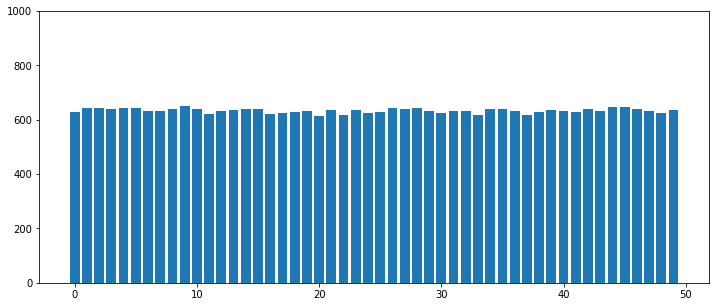

In [4]:
# Start iterating.
sampler(n=1000,N=1000,it=50)

### 3. Iterating over the sample size with a fixed range and number of iterations.

In [5]:
def sampler_size(N,it):
    print('Range:                 {0}'.format(N))
    print('Iterations:            {0}'.format(it))
    
    n = np.linspace(1,4*N,4*N)
    it_arr = []
    sample_arr = []
    
    for i in range(len(n)):
        for j in range(it):
            arr = np.random.randint(0,high=N,size=int(n[i])) # Sampling
            unique_arr = np.unique(arr) # Array with unique values.
            it_arr.append(len(unique_arr))
        sample_arr.append(np.average(it_arr))
        it_arr = []
    
    plt.figure(figsize=(15,4.8))
    plt.plot(n,sample_arr)
    plt.xlabel('Number of samples',fontsize=14); plt.ylabel('Number of unique values for $n$',fontsize=14)
    plt.xlim(0,n[-1]); plt.ylim(0,N)
    
    plt.show()

Range:                 100
Iterations:            50


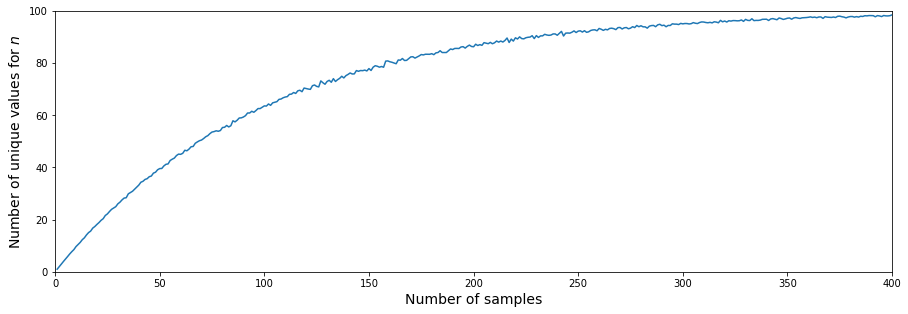

In [6]:
# Start iterating.
sampler_size(N=100,it=50)

Range:                 1000
Iterations:            50


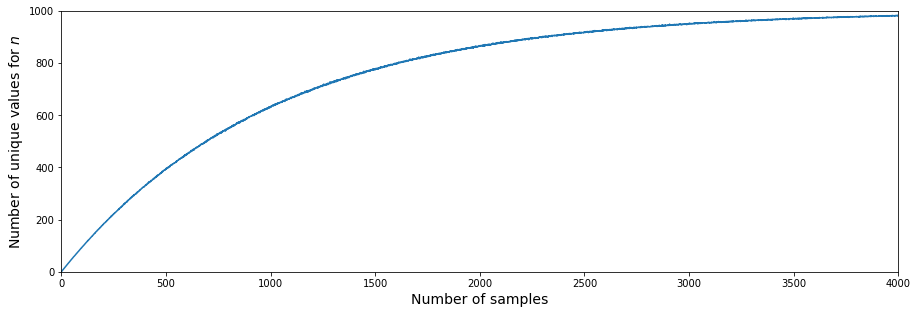

In [7]:
sampler_size(N=1000,it=50)

### 4. Iterating the range with a fixed number of samples

In [8]:
def sampler_range(n,it):
    print('Number of samples:     {0}'.format(n))
    print('Iterations:            {0}'.format(it))
    
    N = np.linspace(1,4*n,4*n)
    it_arr = []
    sample_arr = []
    
    for i in range(len(N)):
        for j in range(it):
            arr = np.random.randint(0,high=int(N[i]),size=n) # Sampling
            unique_arr = np.unique(arr) # Array with unique values.
            it_arr.append(len(unique_arr))
        sample_arr.append(np.average(it_arr))
        it_arr = []
    
    plt.figure(figsize=(16,4.8))
    plt.plot(N,sample_arr)
    plt.xlabel('Sample range',fontsize=14); plt.ylabel('Number of unique values for $N$',fontsize=14)
    plt.xlim(0,N[-1]); plt.ylim(0,n)
    
    plt.show()

Number of samples:     100
Iterations:            50


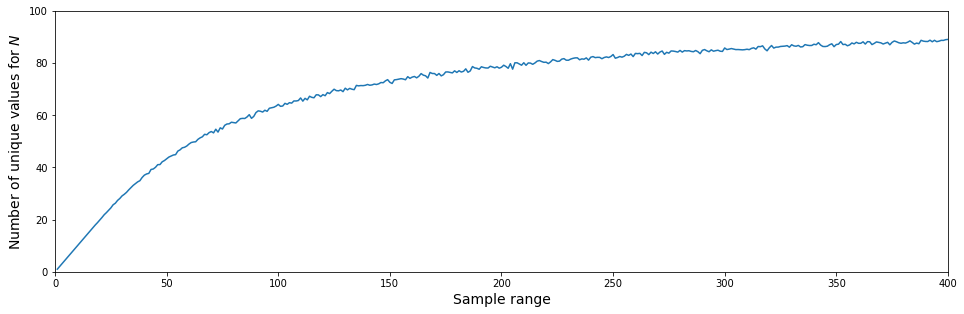

In [9]:
# Start iterating.
sampler_range(n=100,it=50)

Number of samples:     200
Iterations:            20


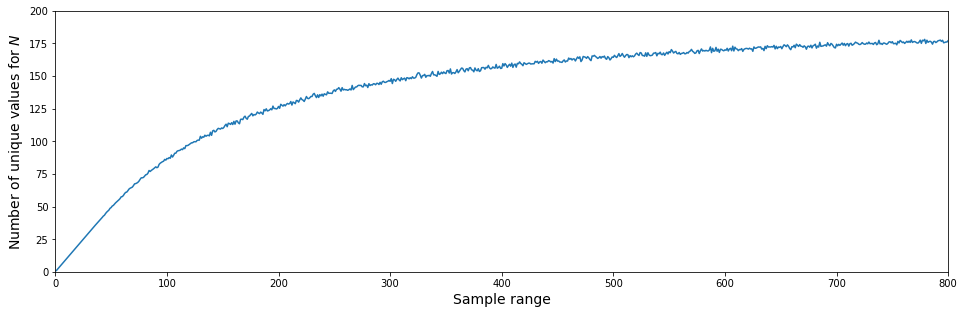

In [10]:
sampler_range(n=200,it=20)

### 5. Find polynomial parameter values relative to the ratio of $n$ and $N$.

In [29]:
def pol_fit(N,it):
    n = np.linspace(1,4*N,4*N)
    it_arr = []
    sample_arr = []
    
    for i in range(len(n)):
        for j in range(it):
            arr = np.random.randint(0,high=N,size=int(n[i])) # Sampling
            unique_arr = np.unique(arr) # Array with unique values.
            it_arr.append(len(unique_arr))
        sample_arr.append(np.average(it_arr))
        it_arr = []
    
    p = np.polyfit(n/N,np.array(sample_arr)/N,6)
    pol = 0
    for i in range(len(p)):
        pol += p[len(p)-1-i]*(n/N)**int(i)
    
    plt.figure(figsize=(16,10))
    plt.plot(n/N,np.array(sample_arr)/N)
    plt.plot(n/N,n/N)
    plt.plot(n/N,pol)
    plt.xlabel('Number of samples',fontsize=14); plt.ylabel('Number of unique values for $n$',fontsize=14)
    plt.xlim(0,n[-1]/N); plt.ylim(0,N/N)
    plt.show()
    
    return p
        
    

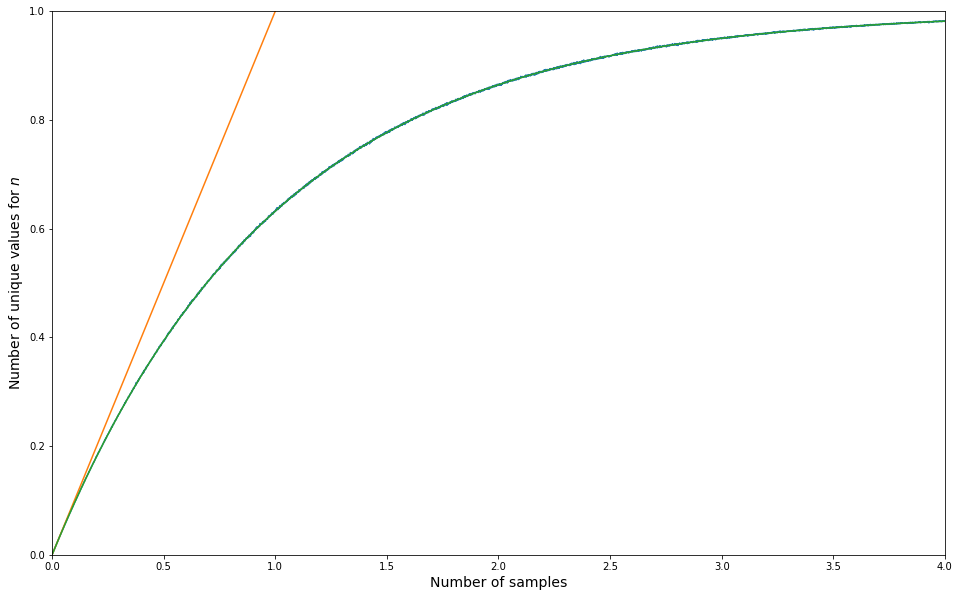

[-2.07921213e-04  3.81498875e-03 -3.12982353e-02  1.53264788e-01
 -4.91373896e-01  9.97998394e-01  1.57132164e-04]


In [35]:
p = pol_fit(N=1000,it=100)
print(p)

### 6. Validation.

In [36]:
def polynomial(n,N):
    pol_value = 0
    for i in range(len(p)):
        pol_value += p[len(p)-1-i]*(n/N)**int(i)
    return pol_value*N

In [37]:
def confirmer(n,N,it):
    it_arr = []
    
    for i in range(it):
        arr = np.random.randint(0,high=N,size=n) # Sampling
        unique_arr = np.unique(arr) # Array with unique values.
        it_arr.append(len(unique_arr))
    
    return np.average(it_arr)
    

In [47]:
n = 10
N = 10000
print(polynomial(n,N))
print(confirmer(n,N,100))
print(np.abs(polynomial(n,N)/confirmer(n,N,100)*100-100))

11.546393367979533
9.99
15.463933679795332
